- merge - 데이터 병합
  - 기업에 수많은 DB는 나눠서 저장되고 있다
  - 주문, 고객, 상품, 배송 기타 등등 테이블로 나뉘어져 있다.
  - 병합을 통해 원하는 데이터셋으로 만들어야 한다.
- merge()
  - 두 개의 테이블을 합칠 때 공통된 컬럼을 기준으로 합친다.
  - 교집합 또는 다른 방법으로도 데이터를 병합할 수 있다.
    - left,right,outer,inner join
    - pd.merge(df1,df2)
      - pd.merge(df1,df2, on='기준컬럼',how='조인방법')
- concat()
  - 두 데이터프레임을 공통된 기준 없이 축 기준으로 합친다.
  - 축 기준으로 합치니 -> 행과 열의 기준으로 합치는 것
    - 행 python axis =0
    - 열 python axis =1
      - pd.concat([df1,df2],axis=?)
- join()
  - 인덱스 기준으로 병합합

In [17]:
import pandas as pd

In [18]:
test1=pd.DataFrame({'학회원번호':[1,2,3,4,5],
                    '학회원분반':['python','sql','r','데이터분석입문','데이터분석통계']})
test2=pd.DataFrame({'학회원번호':[1,2,3,4,6],
                    '학회원현황':[100,200,300,400,500]})

In [19]:
display(test1)
display(test2)

,학회원번호,학회원분반
0,1,python
1,2,sql
2,3,r
3,4,데이터분석입문
4,5,데이터분석통계


,학회원번호,학회원현황
0,1,100
1,2,200
2,3,300
3,4,400
4,6,500


In [20]:
print(test1)

   학회원번호    학회원분반
0      1   python
1      2      sql
2      3        r
3      4  데이터분석입문
4      5  데이터분석통계


In [21]:
## 디폴트는 교집합으로 잡는다.
pd.merge(test1,test2)

,학회원번호,학회원분반,학회원현황
0,1,python,100
1,2,sql,200
2,3,r,300
3,4,데이터분석입문,400


In [22]:
pd.merge(test1,test2,how='left')

,학회원번호,학회원분반,학회원현황
0,1,python,100.0
1,2,sql,200.0
2,3,r,300.0
3,4,데이터분석입문,400.0
4,5,데이터분석통계,NaN


In [23]:
pd.merge(test1,test2,how='right')

,학회원번호,학회원분반,학회원현황
0,1,python,100
1,2,sql,200
2,3,r,300
3,4,데이터분석입문,400
4,6,NaN,500


In [24]:
pd.merge(test1,test2,how='outer')

,학회원번호,학회원분반,학회원현황
0,1,python,100.0
1,2,sql,200.0
2,3,r,300.0
3,4,데이터분석입문,400.0
4,5,데이터분석통계,NaN
5,6,NaN,500.0


In [25]:
pd.concat([test1,test2],axis=0)

,학회원번호,학회원분반,학회원현황
0,1,python,NaN
1,2,sql,NaN
2,3,r,NaN
3,4,데이터분석입문,NaN
4,5,데이터분석통계,NaN
0,1,NaN,100.0
1,2,NaN,200.0
2,3,NaN,300.0
3,4,NaN,400.0
4,6,NaN,500.0


In [26]:
pd.concat([test1,test2],axis=1)

,학회원번호,학회원분반,학회원번호,학회원현황
0,1,python,1,100
1,2,sql,2,200
2,3,r,3,300
3,4,데이터분석입문,4,400
4,5,데이터분석통계,6,500


In [36]:
student1 = pd.DataFrame({'학생 이름':['김민석','이기영','이초롱','박화영','김단희'],
                         '학생 번호':[1,2,3,4,7]})
student2 = pd.DataFrame({'학생 이름':['김민석','이기영','이초롱','박화영','김단희'],
                         '학생 분반':[1,2,2,3,1]})


In [28]:
display(student1)
display(student2)

,학생 이름,학생 번호
0,김민석,1
1,이기영,2
2,이초롱,3
3,박화영,4
4,김단희,7


,학생 이름,학생 분반
0,이유진,1
1,임사랑,2
2,강경민,2
3,정수민,3
4,이가온,1


In [37]:
pd.merge(student1,student2)

,학생 이름,학생 번호,학생 분반
0,김민석,1,1
1,이기영,2,2
2,이초롱,3,2
3,박화영,4,3
4,김단희,7,1


In [38]:
pd.merge(student1,student2, how='left')

,학생 이름,학생 번호,학생 분반
0,김민석,1,1
1,이기영,2,2
2,이초롱,3,2
3,박화영,4,3
4,김단희,7,1


머신러닝

- 지도학습(supervised learning)
    - 정답이 있는 데이터셋
    - 레이블된 데이터
    - 머신에게 정답을 알려주어서 학습
    - 데이터의 패턴을 통한 학습
      - 데이터의 패턴을 찾는 방법
    - 인간이 대부분 피처의 중요도를 선정하게 된다
      - 지도학습
      - 예측
        - 분류(Classificaition)-이진분류 0,1의 분류, 성공과 실패, 사기, 정상, 스팸, 스팸이 아닌 경우, 고객등급도 분류(일반,VIP)
          - 이진분류 Binary
          - 다중분류
        - 회귀(Regression)-연속적인 값들을 예측, 매출 예측, 주문 예측 등등
        - 연속적인 값
        - 예측변수가 연속적인 수 target, 다른 피처(컬럼,독립변수,X)들을 통해서 y값인 target을 예측
        - 선형회귀분석

- 비지도학습(unsupervised learning)
  - 정답이 없다(학습시킬 답이 있는 건 아니다)
  - 머신에게 데이터 속에서 어떠한 패턴을 찾고 -> 레이블링 (정답을 만들어라) 해라
  - 정답 -> clustering 유사한 친구들끼리 군집화 하는 과정
  - 데이터 내에서 인간이 볼 수 없는 패턴을 찾아주는 것
- 강화학습(reinforement learning)
  - 알파고
  - 보상시스템, 결정과정
  - 연속된 행동을 통해 올바른 행동이 무엇인지 알려주게 되고 -> 올바른 행동을 진행하면 보상을 주면서 학습 진행

In [29]:
import seaborn as sns

df=sns.load_dataset('titanic')

In [30]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- 타이타닉 데이터셋은 survived 생존이라는 컬럼이 Target
  - y값
  - 0,1를 예측
  - 지도학습의 분류 문제를 푸는 것
  - 정답 데이터셋을 확인해 보자
    - 정답 데이터셋이 균형적인 불균형적인지 정말 중요한 역할을 한다.
    - 정답의 불균형은 꼭 꼭 확인해야 하는 중요한 문제다!
      - 만약 실제 문제에서
        - 정상/사기 탐지를 하는데
        - 정상은 10,000건 사기는 5건 밖에 없다

In [31]:
df.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

- 생존과 어떤 컬럼(피처)이 차이를 줄 수 있을까

In [42]:
## groupby 문법을 통해 생존율 비교해 보자
## pclass별 sex별 survived의 차이가 존재할까

df[['survived','sex']].groupby(['sex']).mean().sort_values(by='survived',ascending=False)

,survived
sex,
female,0.742038
male,0.188908


In [43]:
df[['survived','sex']].groupby(['sex']).mean()

,survived
sex,
female,0.742038
male,0.188908


In [46]:
df[['survived','pclass']].groupby(['pclass']).mean().sort_values(by='survived',ascending=False)

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [47]:
df[['survived','embark_town']].groupby('embark_town').mean()

,survived
embark_town,
Cherbourg,0.553571
Queenstown,0.389610
Southampton,0.336957


In [48]:
df[['survived','age']].groupby('age').mean()

,survived
age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


간단한 groupby 나 집계 등을 통해 데이터의 차이를 비교할 수 있지만 -> 시각적으로도 데이터의 차이를 확인 할 수 있따

- 데이터 시각화 EDA 필요하다!
- X값(피처)학습할 피처들이 연속적인 값, 카테고리, 범주형 값일 수 있따.
  - 이러한 피처들의 자료에 따라서 전처리 방법과, 시각화 방법이 다르다.

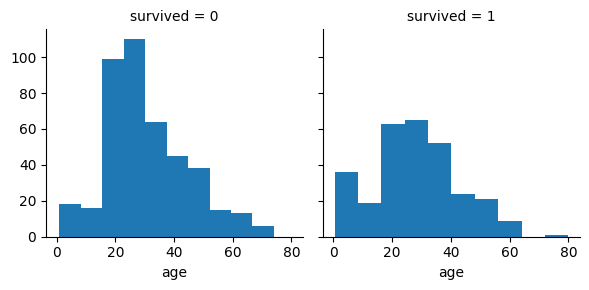

In [50]:
## 시각화 진행
import matplotlib.pyplot as plt

g1=sns.FacetGrid(df, col='survived')
g1.map(plt.hist,'age')

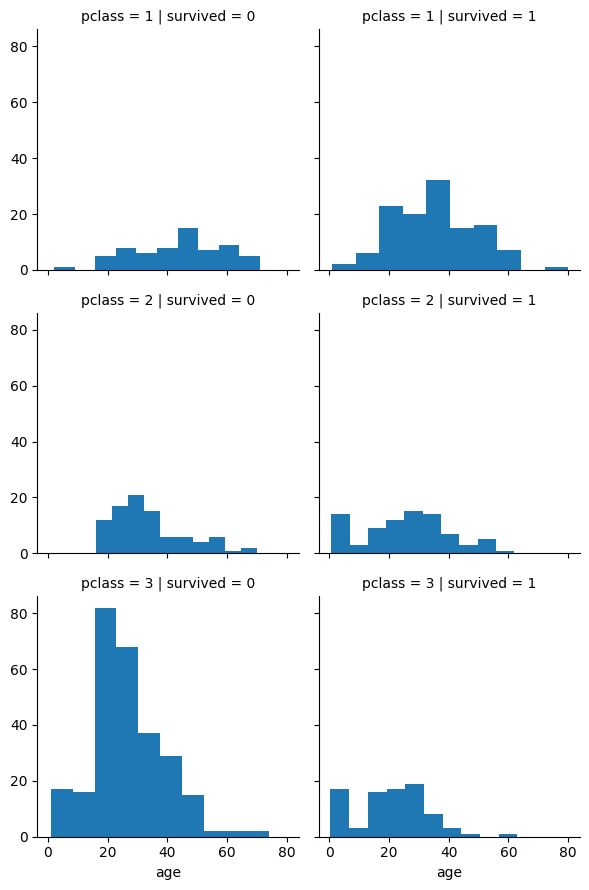

In [51]:
g2=sns.FacetGrid(df, col='survived', row='pclass')
g2.map(plt.hist,'age')

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

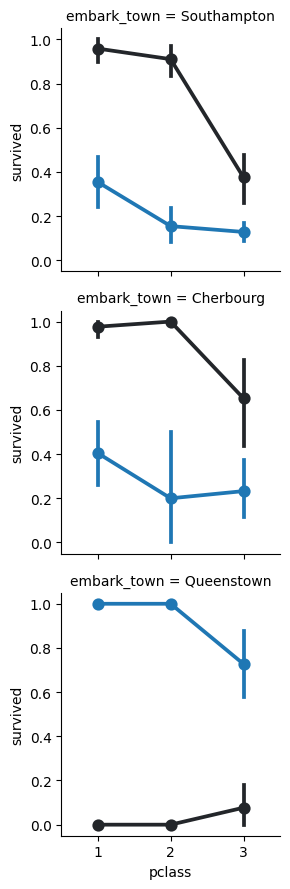

In [52]:
g4 = sns.FacetGrid(df, row='embark_town')
g4.map(sns.pointplot,'pclass','survived','sex')

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


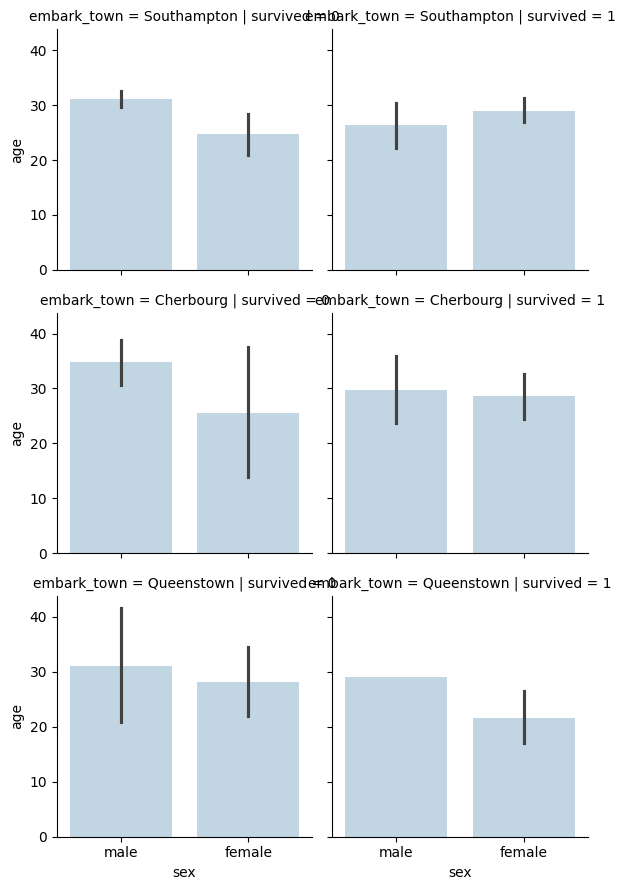

In [55]:
g5=sns.FacetGrid(df, col='survived',row='embark_town')
g5.map(sns.barplot,'sex','age',alpha=0.3)
g5.add_legend()